<a href="https://colab.research.google.com/github/githubuser20152014/marketmonitor/blob/main/Market_monitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
print("jai bajrang bali")

jai bajrang bali


In [7]:
!pip install -q yfinance

In [8]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

## Long term price trend

[*********************100%%**********************]  1 of 1 completed


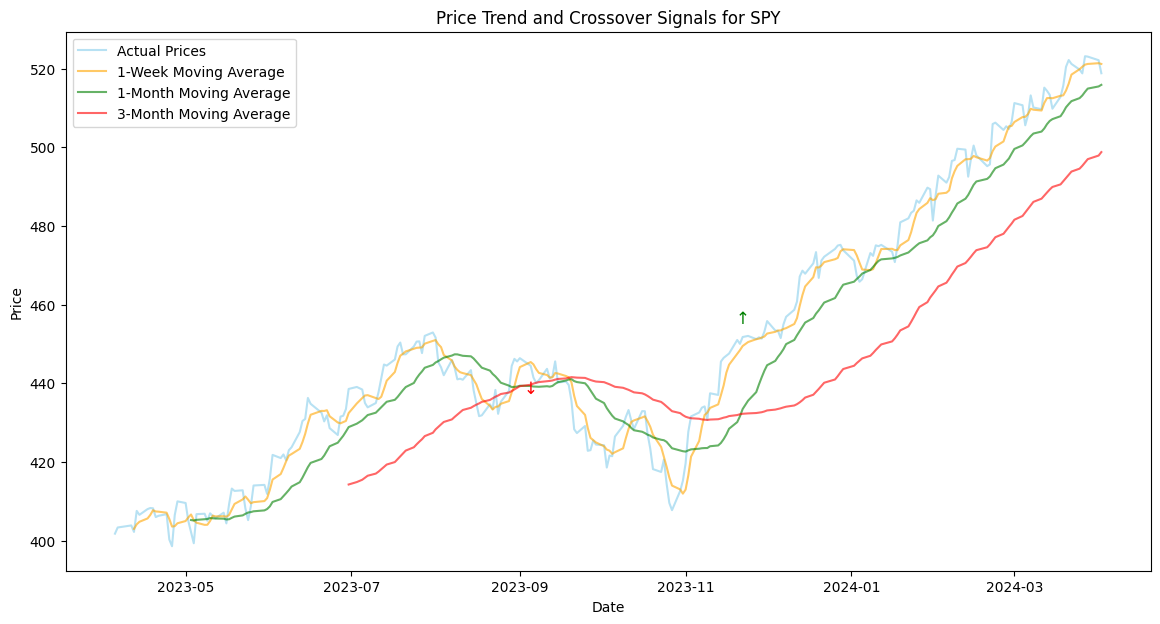

[*********************100%%**********************]  1 of 1 completed


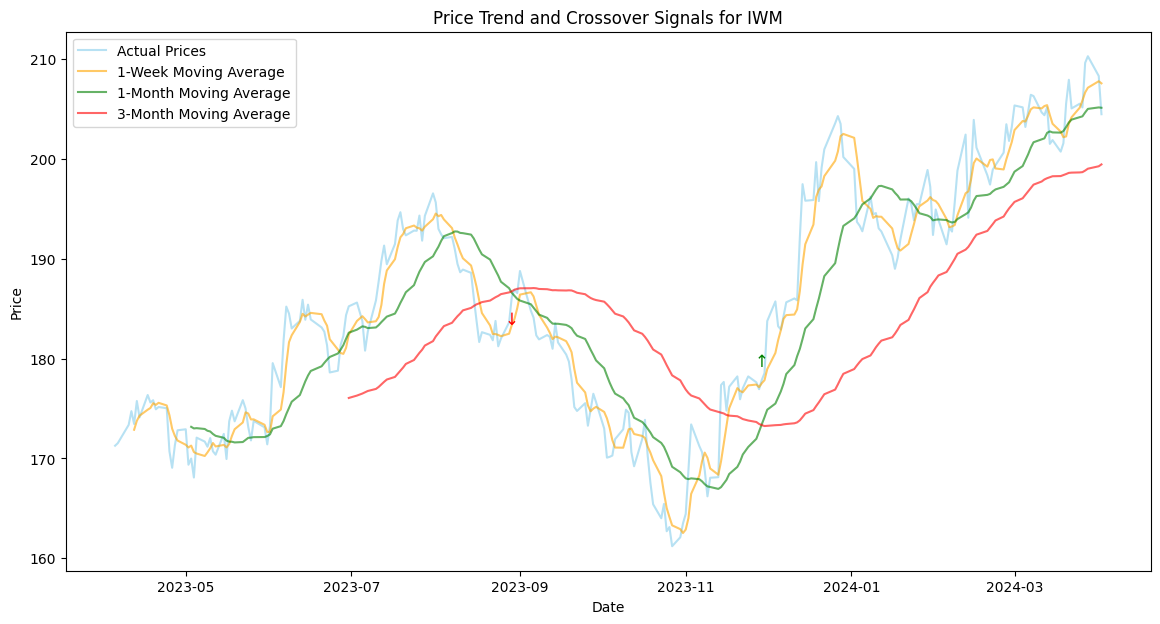

[*********************100%%**********************]  1 of 1 completed


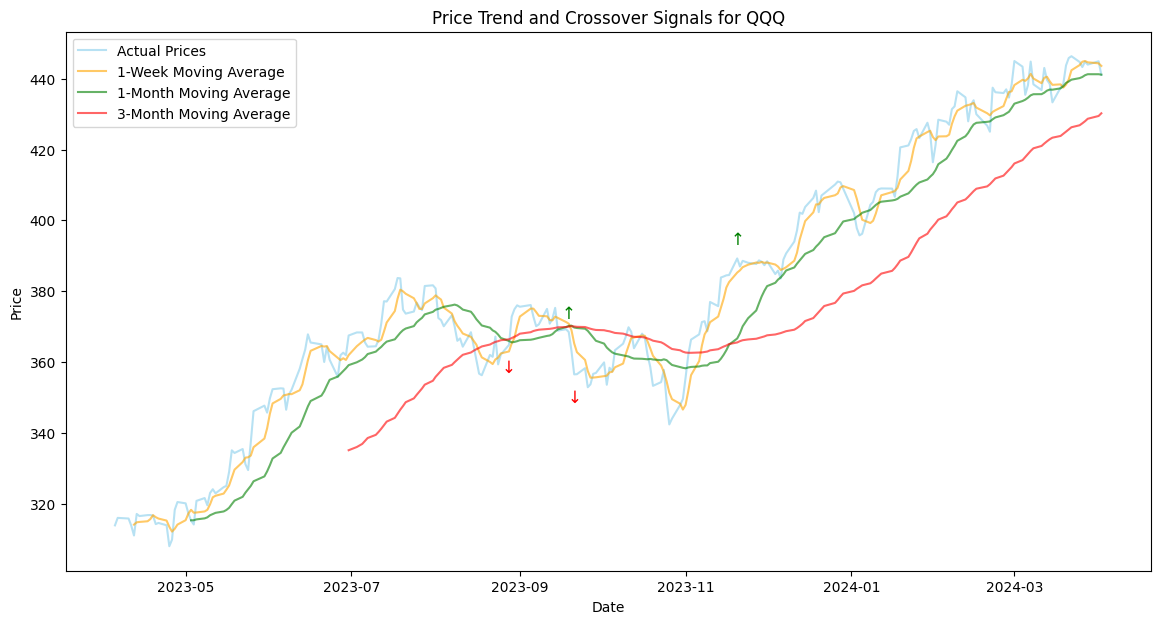

[*********************100%%**********************]  1 of 1 completed


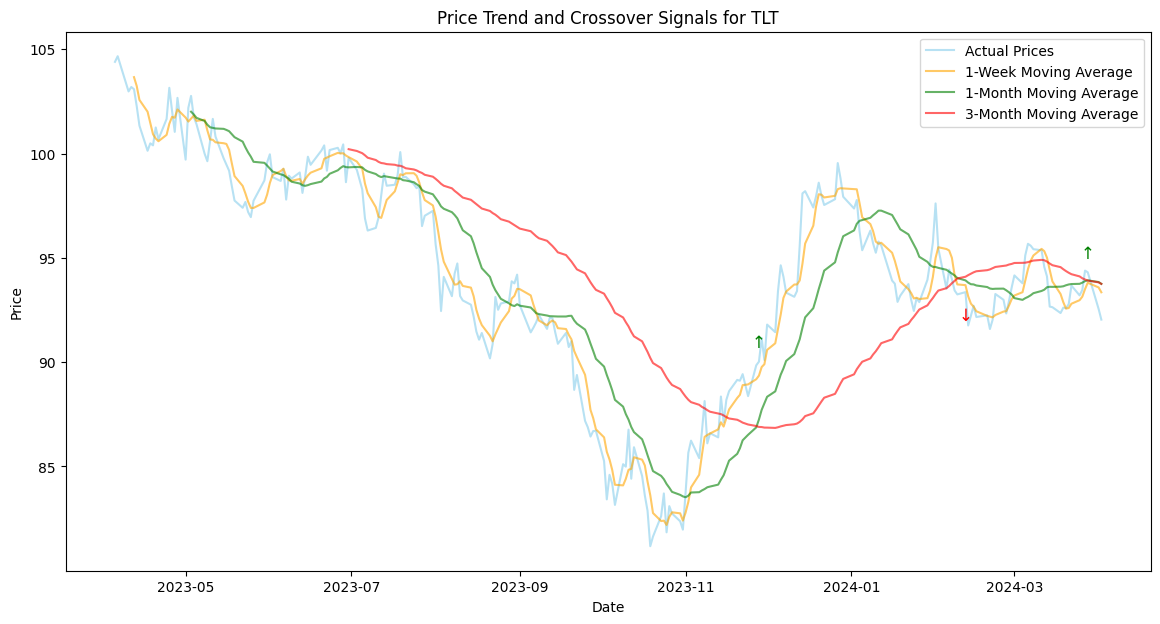

[*********************100%%**********************]  1 of 1 completed


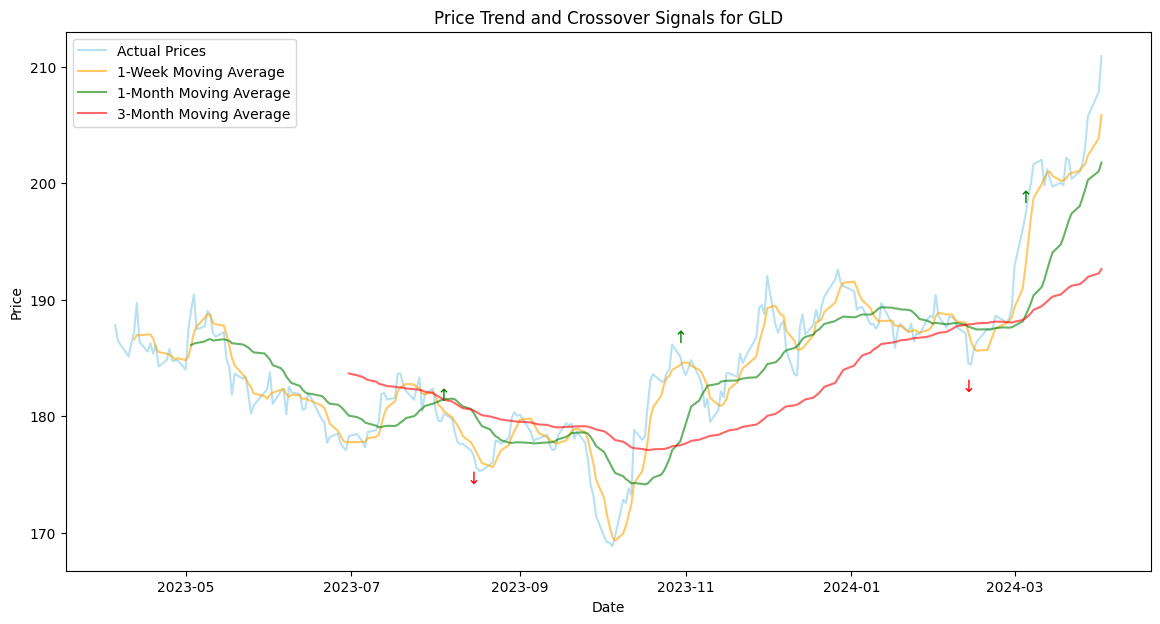

[*********************100%%**********************]  1 of 1 completed


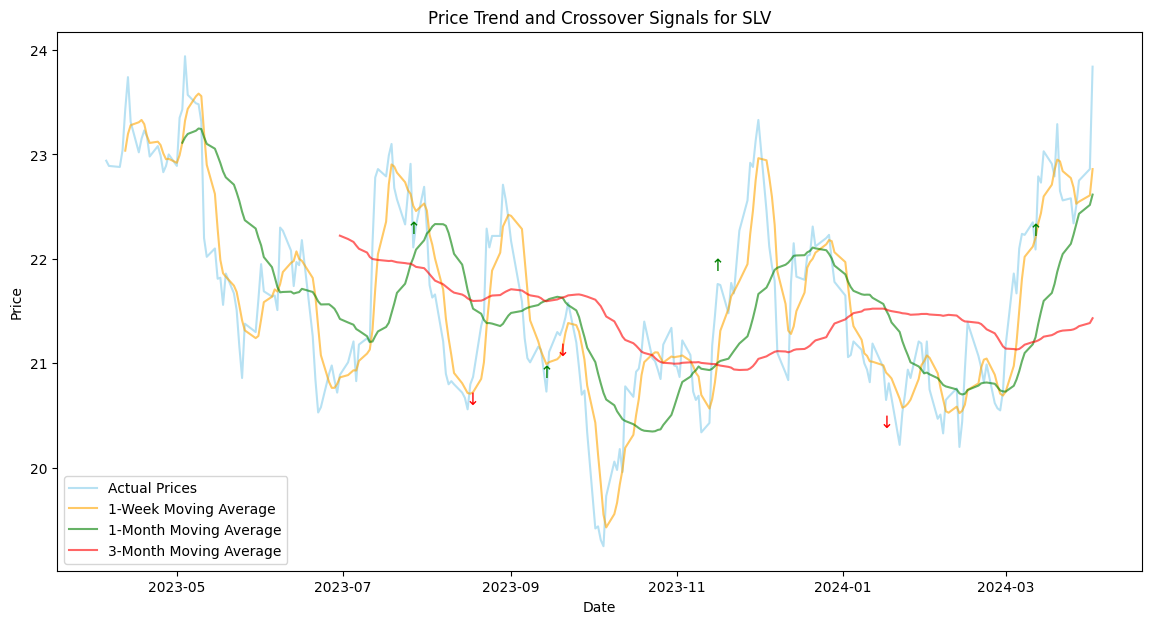

[*********************100%%**********************]  1 of 1 completed


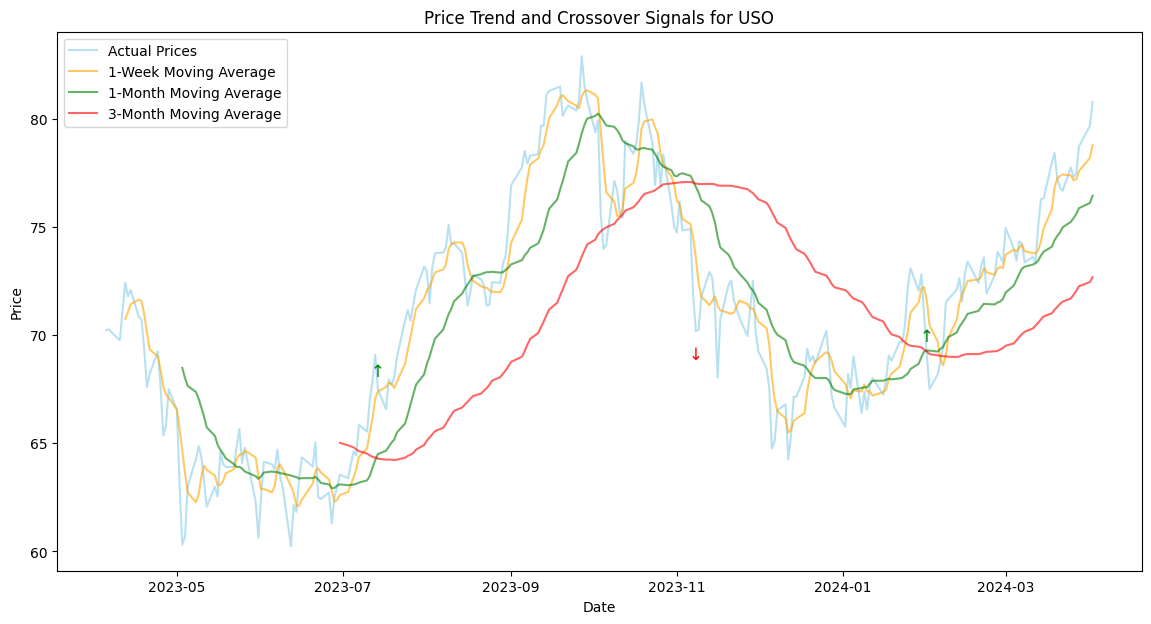

[*********************100%%**********************]  1 of 1 completed


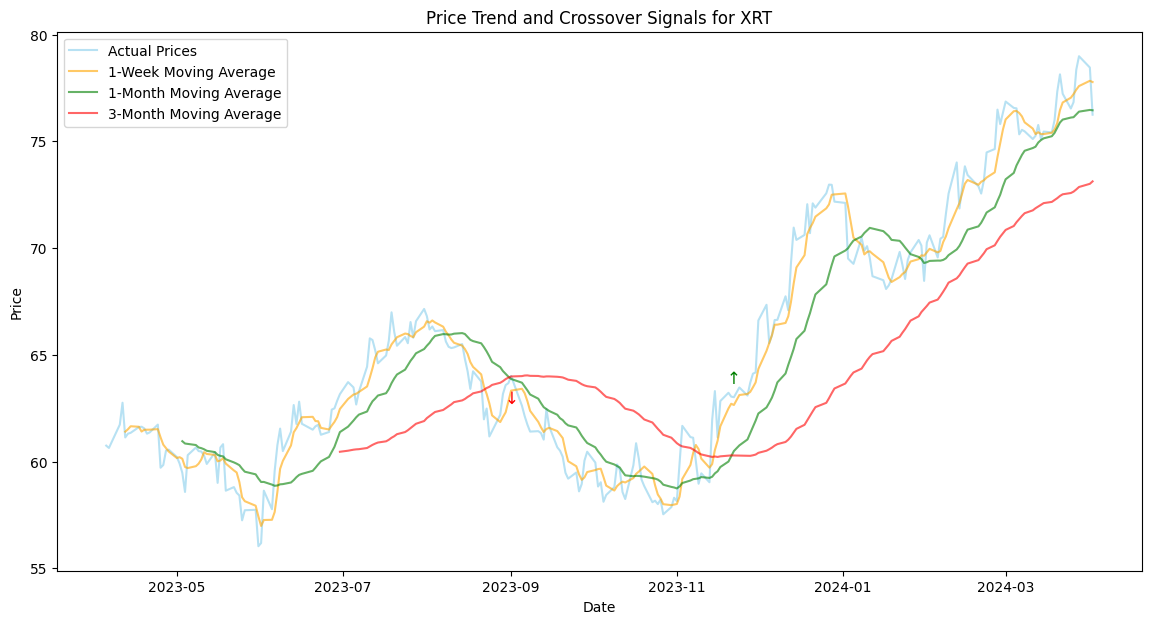

[*********************100%%**********************]  1 of 1 completed


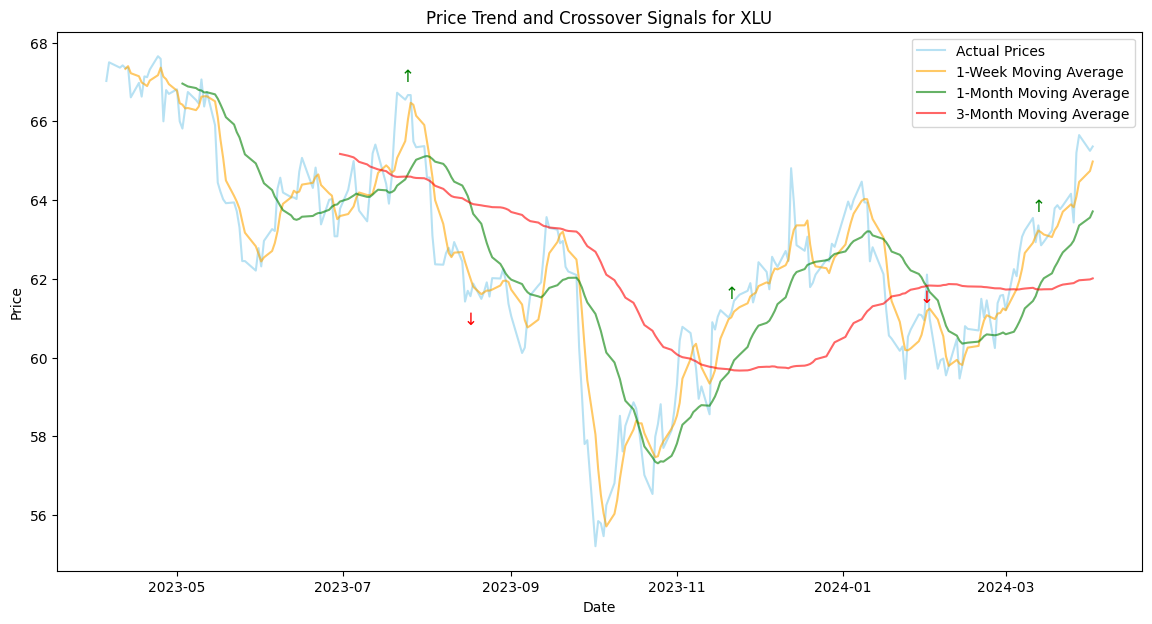

[*********************100%%**********************]  1 of 1 completed


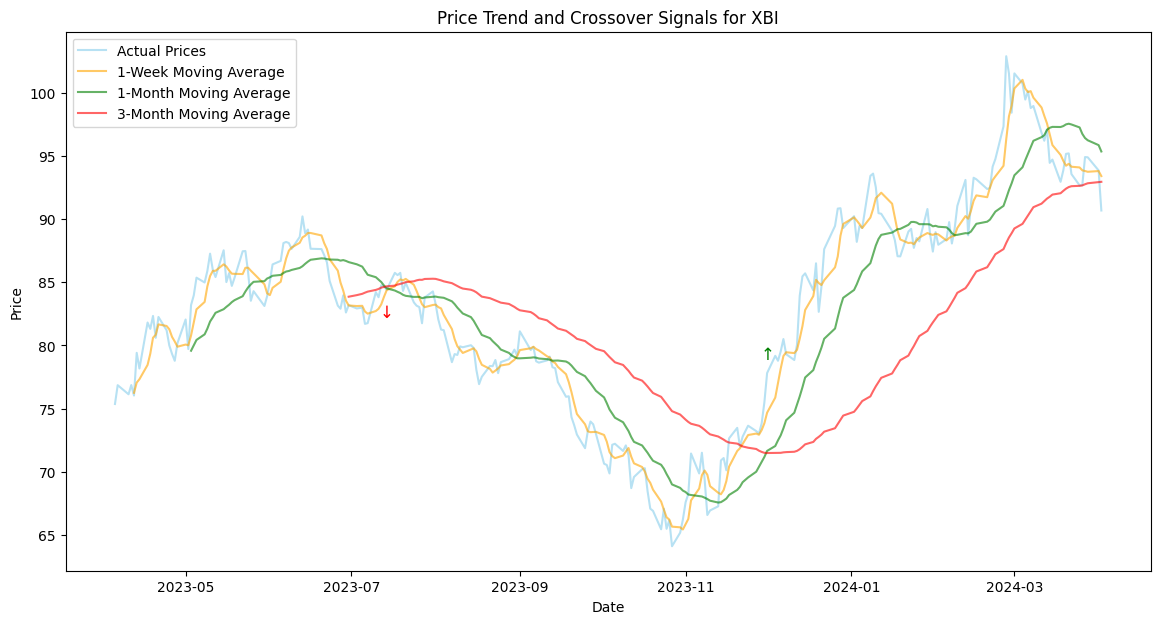

[*********************100%%**********************]  1 of 1 completed


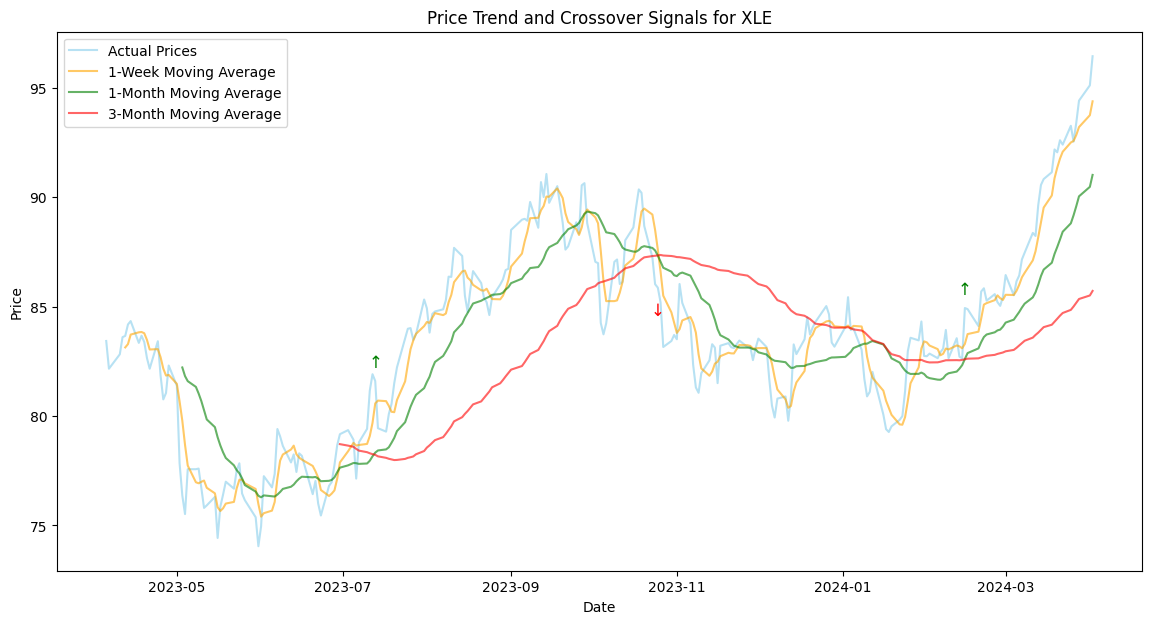

In [9]:
# Define your watchlist of stock tickers
tickers = ['SPY', 'IWM', 'QQQ', 'TLT', 'GLD', 'SLV', 'USO', 'XRT', 'XLU', 'XBI', 'XLE']

# Calculate yesterday's date
yesterday = datetime.now() - timedelta(1)
yesterday_str = yesterday.strftime('%Y-%m-%d')

oneyearago = datetime.now() - timedelta(365)
oneyearago_str = oneyearago.strftime('%Y-%m-%d')

for ticker in tickers:
    # Fetch historical data for the ticker up until yesterday
    data = yf.download(ticker, start=oneyearago_str, end=yesterday_str)

    # Calculate moving averages
    data['1-Week MA'] = data['Adj Close'].rolling(window=5).mean()
    data['1-Month MA'] = data['Adj Close'].rolling(window=20).mean()
    data['3-Month MA'] = data['Adj Close'].rolling(window=60).mean()

    # Find crossover points for buy and sell signals
    buy_signals = (data['1-Month MA'] > data['3-Month MA']) & (data['1-Month MA'].shift(1) <= data['3-Month MA'].shift(1))
    sell_signals = (data['1-Month MA'] < data['3-Month MA']) & (data['1-Month MA'].shift(1) >= data['3-Month MA'].shift(1))

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(data['Adj Close'], label='Actual Prices', color='skyblue', alpha=0.6)
    plt.plot(data['1-Week MA'], label='1-Week Moving Average', color='orange', alpha=0.6)
    plt.plot(data['1-Month MA'], label='1-Month Moving Average', color='green', alpha=0.6)
    plt.plot(data['3-Month MA'], label='3-Month Moving Average', color='red', alpha=0.6)

    # Plot buy signals
    for x in data[buy_signals].index:
        plt.annotate('↑', (x, data['Adj Close'][x]), textcoords="offset points", xytext=(0,10), ha='center', color='green', fontsize=12)

    # Plot sell signals
    for x in data[sell_signals].index:
        plt.annotate('↓', (x, data['Adj Close'][x]), textcoords="offset points", xytext=(0,-20), ha='center', color='red', fontsize=12)

    plt.title(f'Price Trend and Crossover Signals for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

## Short term price trend

[*********************100%%**********************]  1 of 1 completed


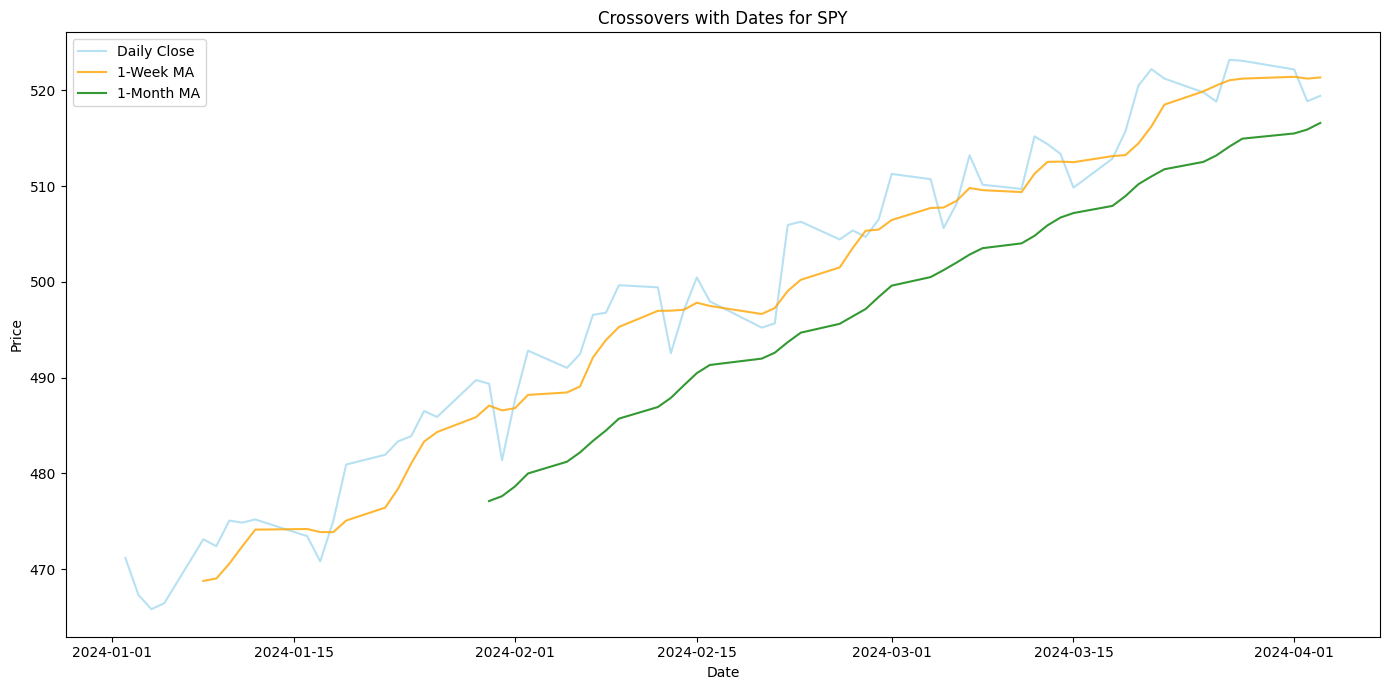

[*********************100%%**********************]  1 of 1 completed


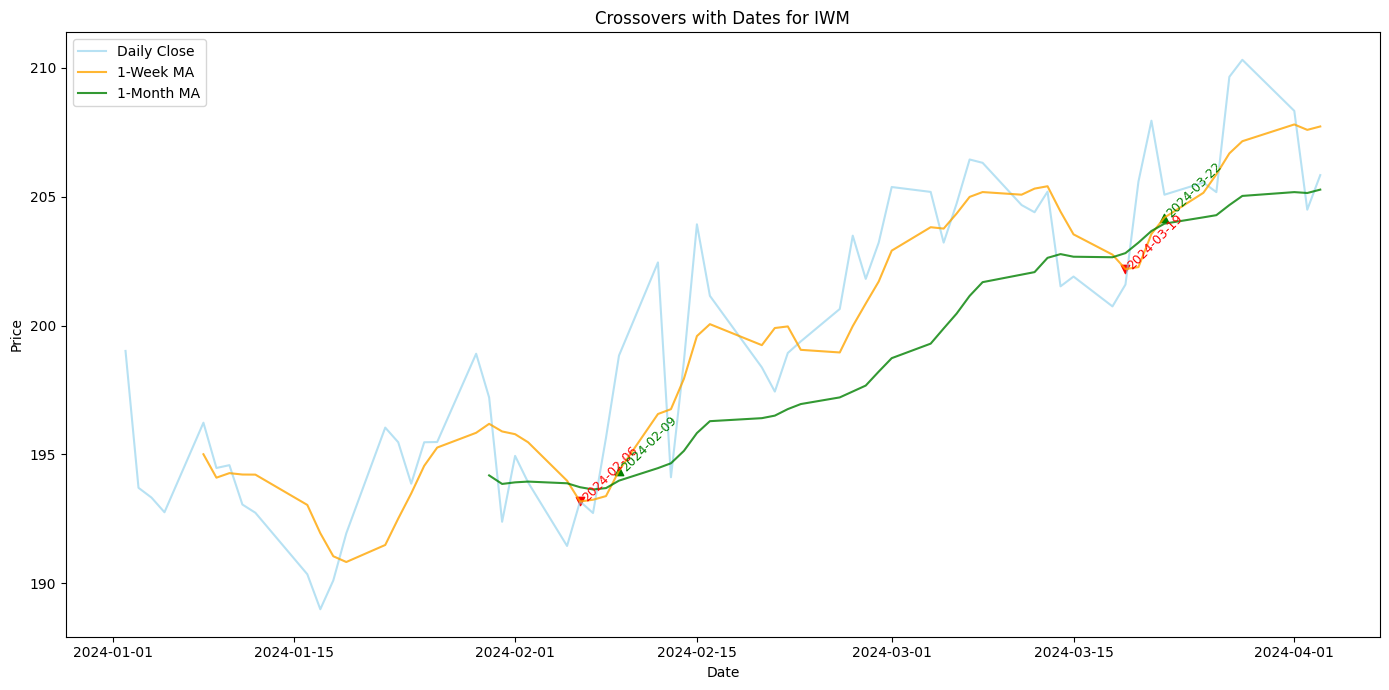

[*********************100%%**********************]  1 of 1 completed


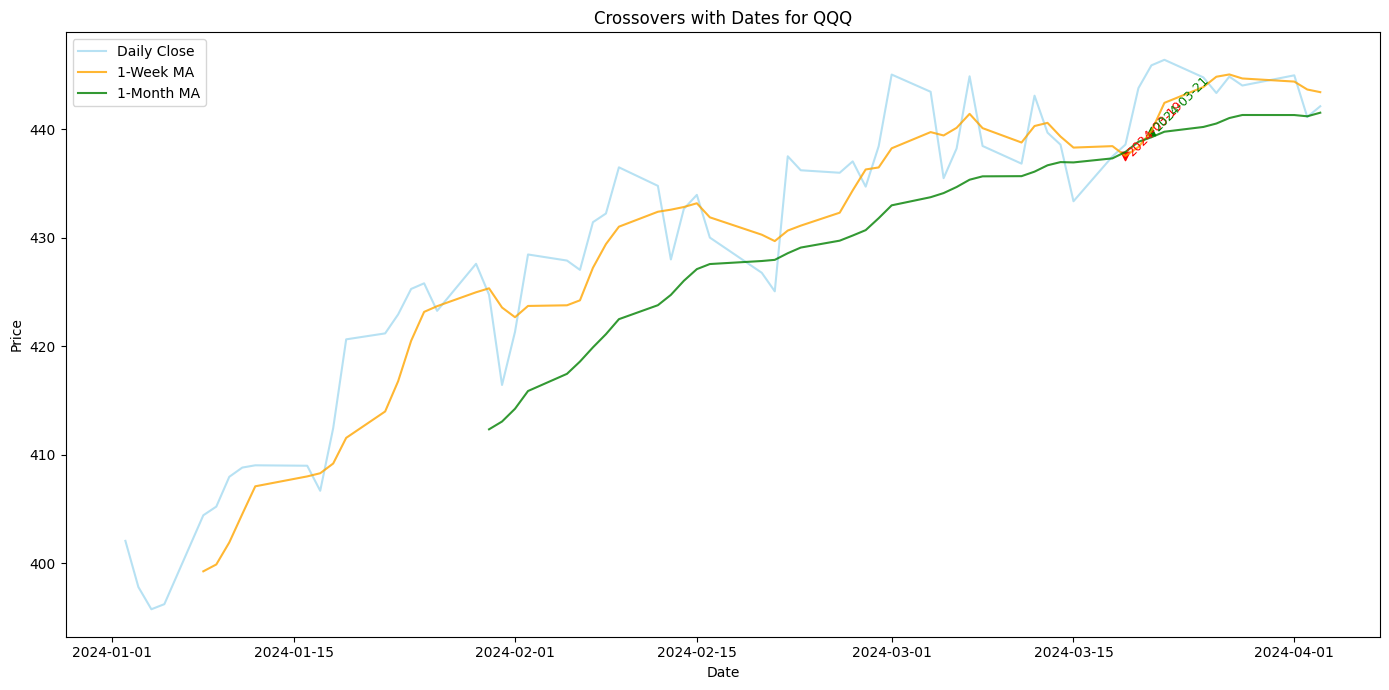

[*********************100%%**********************]  1 of 1 completed


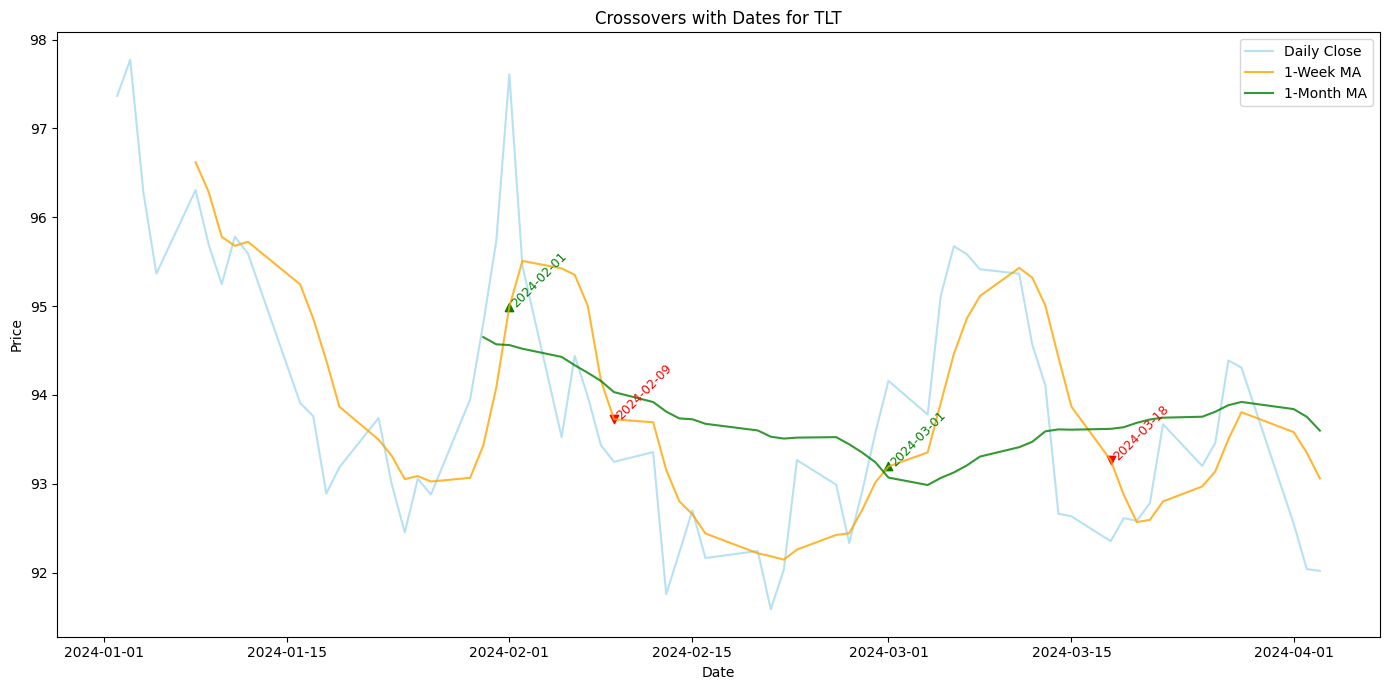

[*********************100%%**********************]  1 of 1 completed


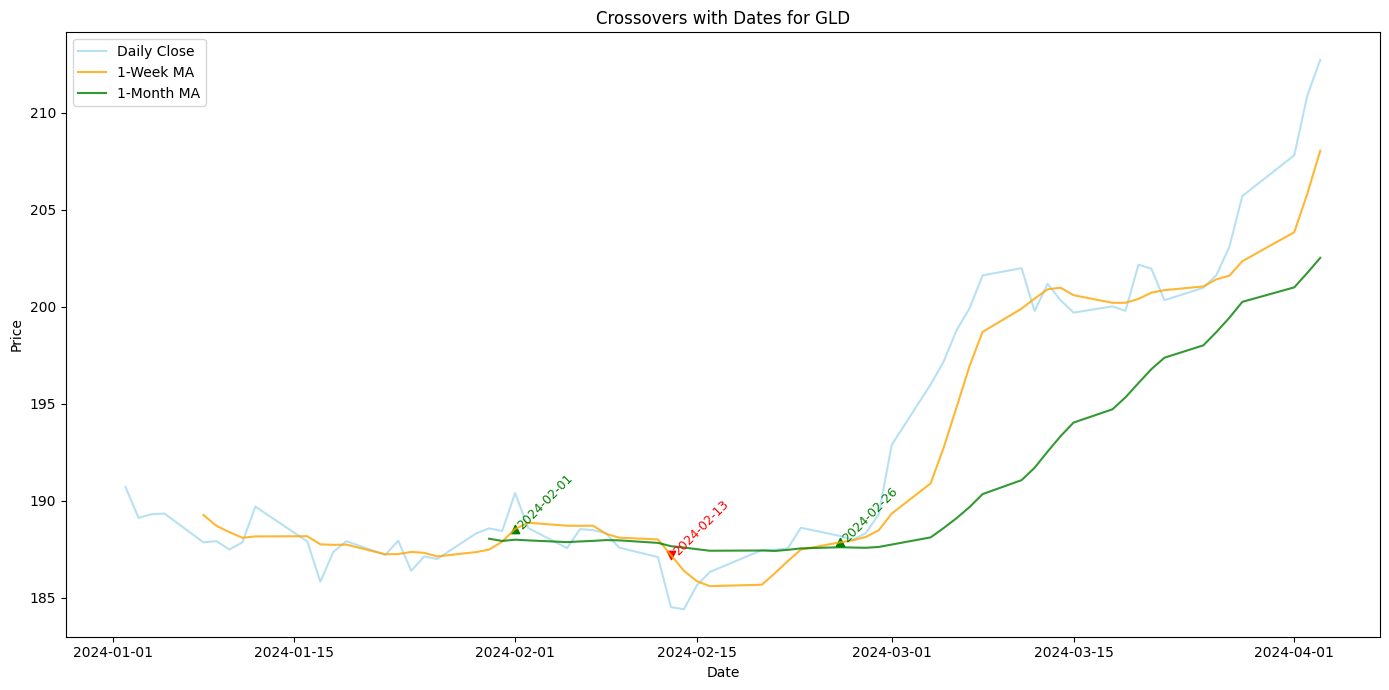

[*********************100%%**********************]  1 of 1 completed


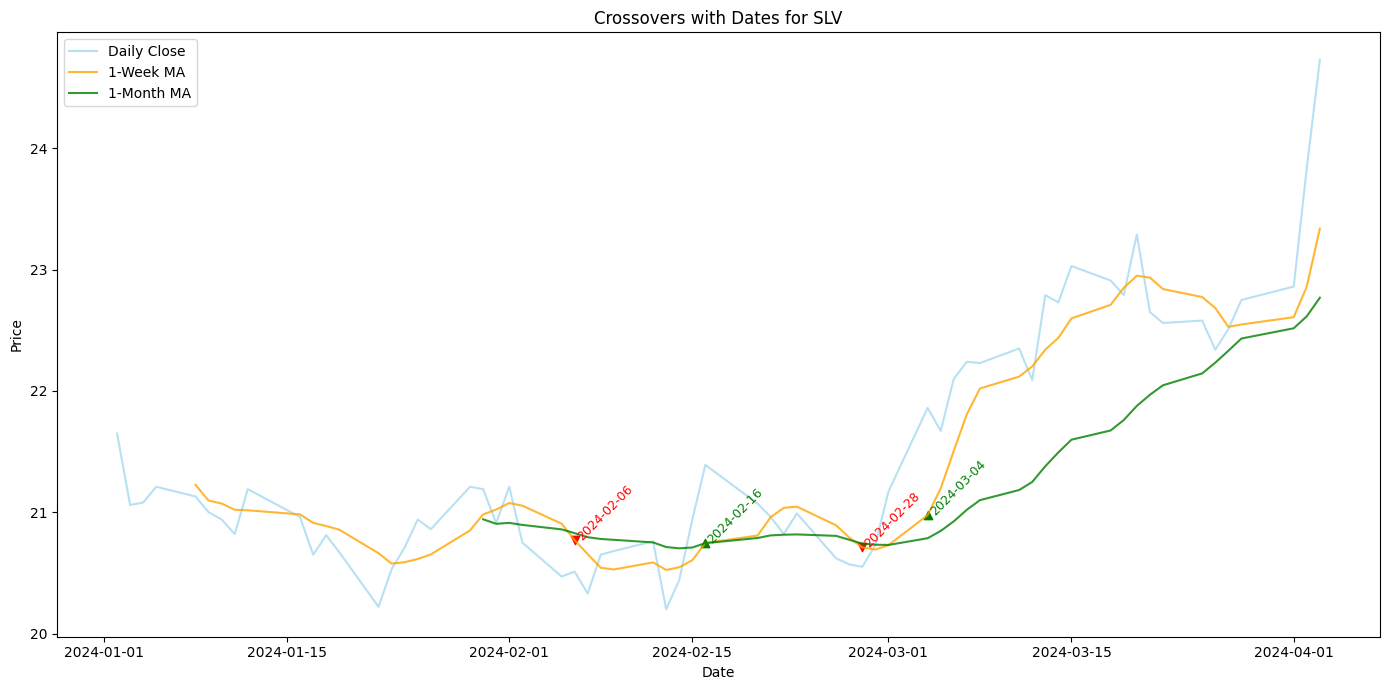

[*********************100%%**********************]  1 of 1 completed


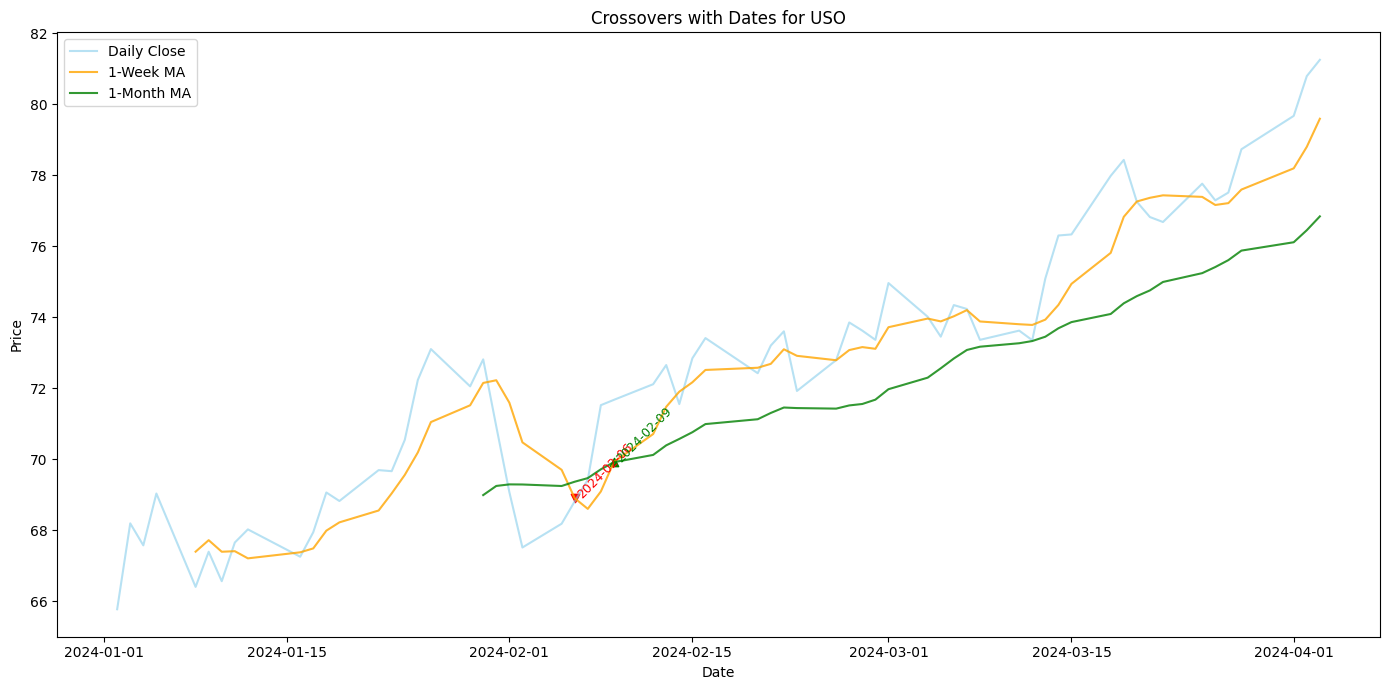

[*********************100%%**********************]  1 of 1 completed


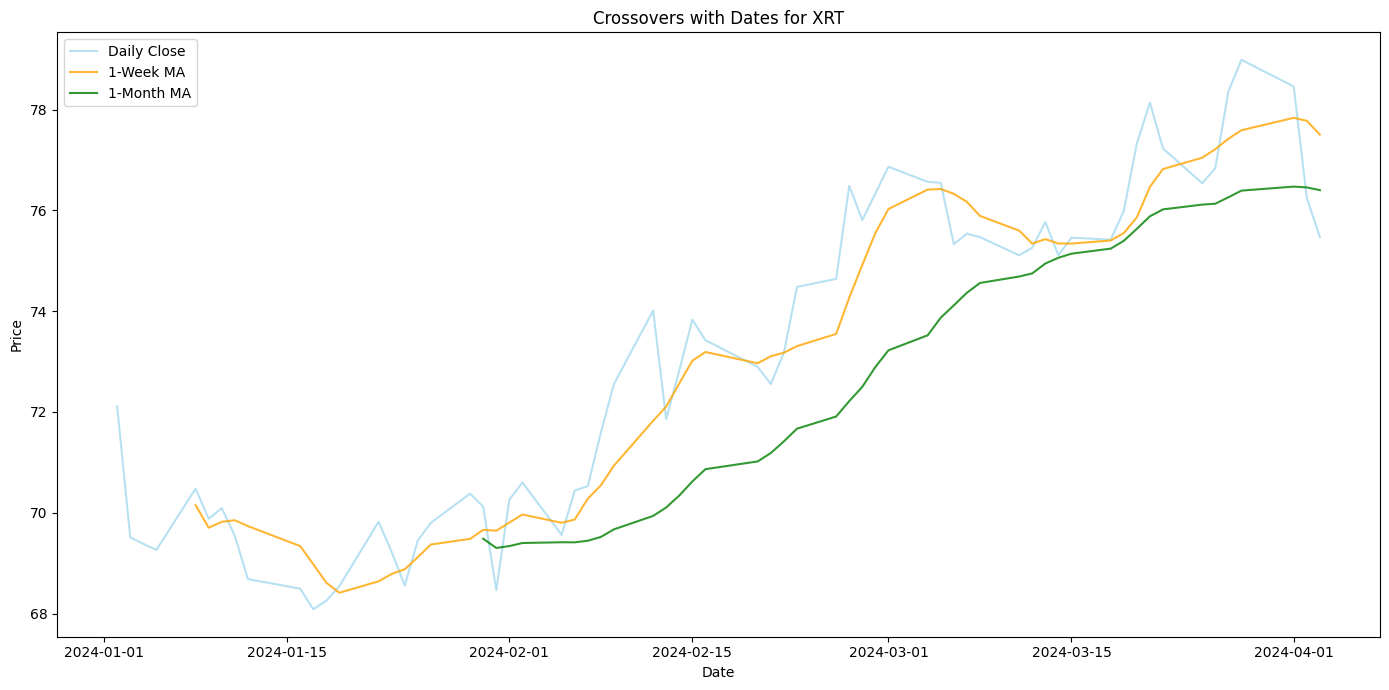

[*********************100%%**********************]  1 of 1 completed


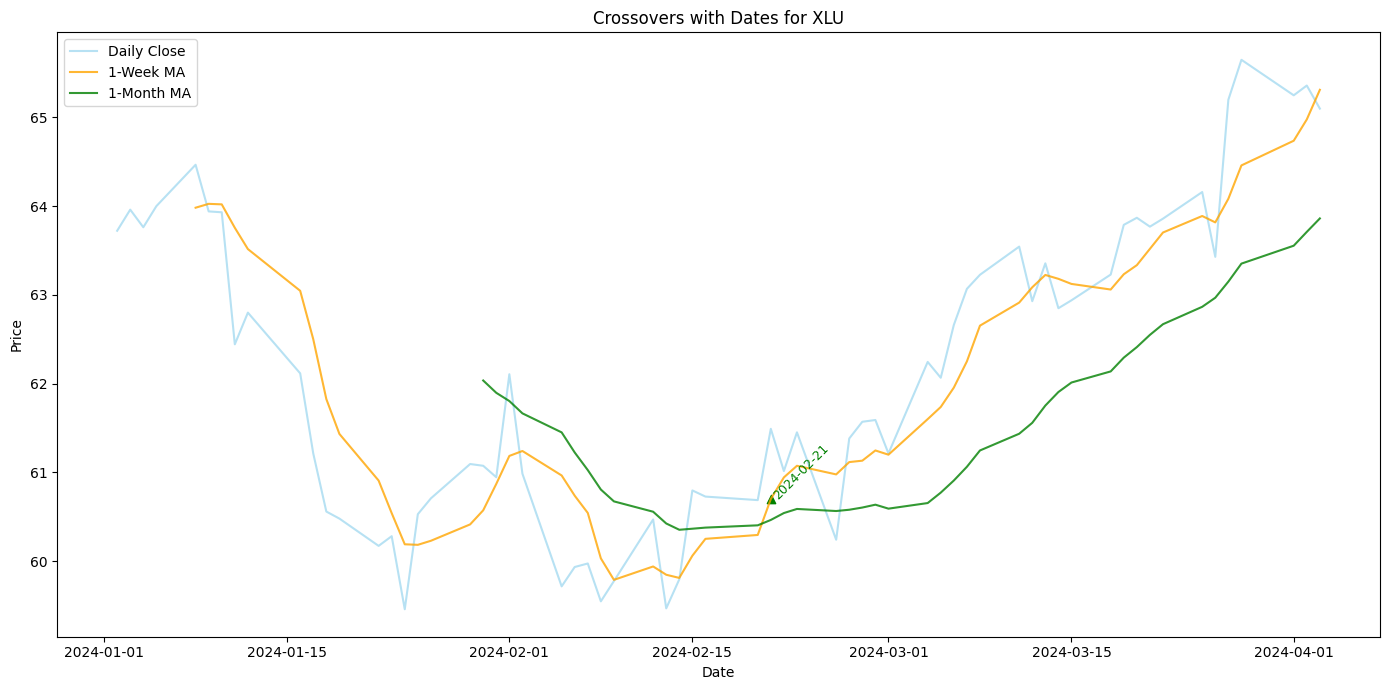

[*********************100%%**********************]  1 of 1 completed


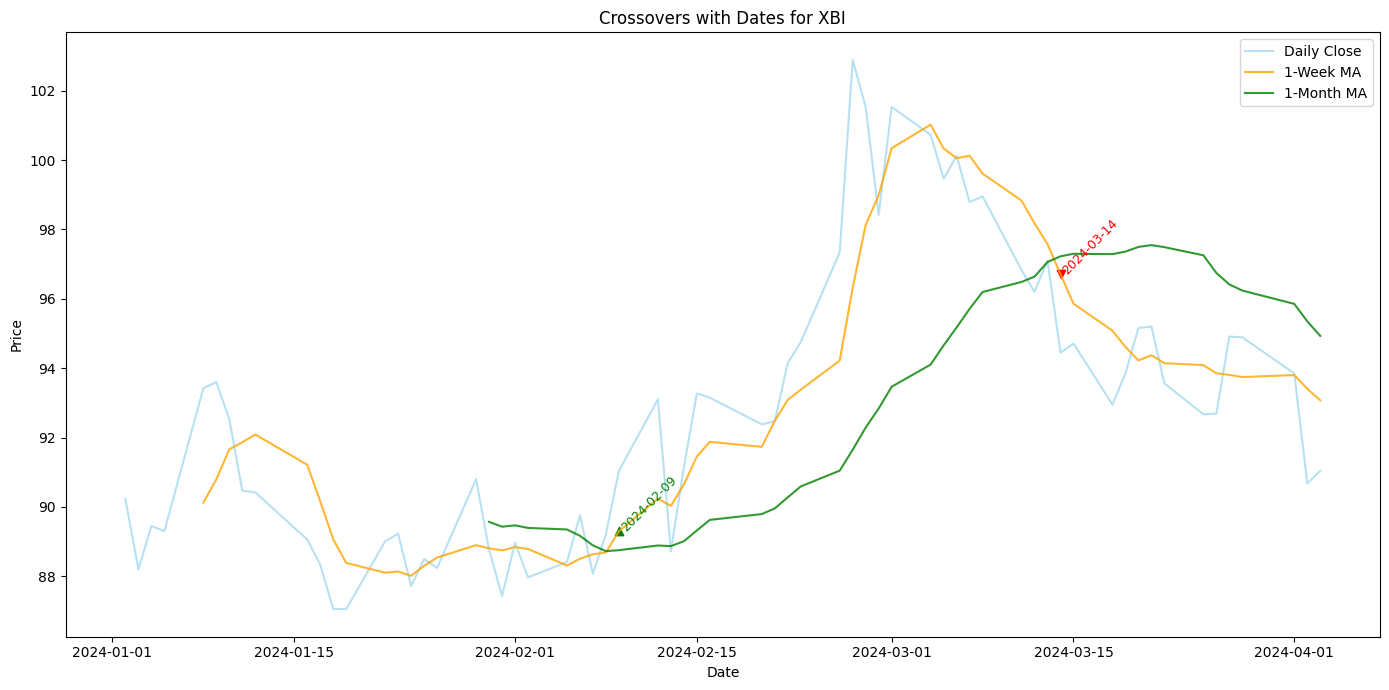

[*********************100%%**********************]  1 of 1 completed


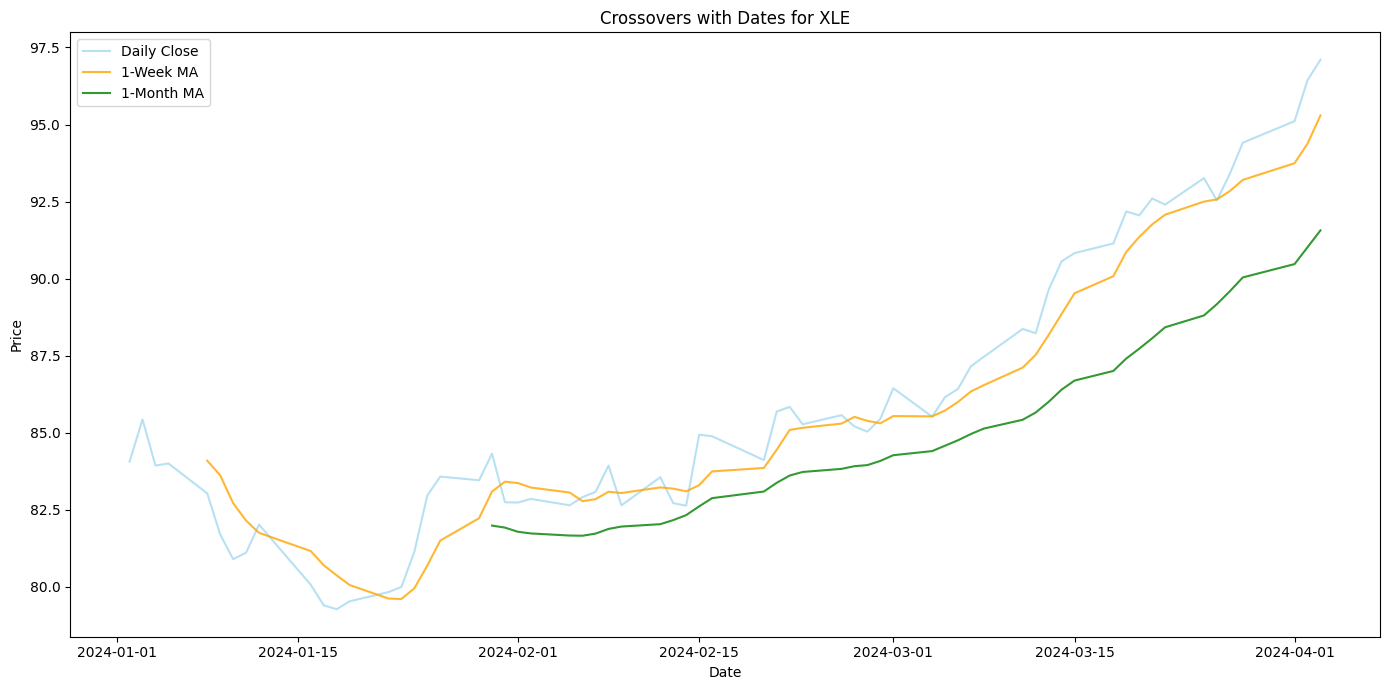


No crossovers in the last 5 days for the tickers.


In [10]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Define the list of tickers
tickers = ['SPY', 'IWM', 'QQQ', 'TLT', 'GLD', 'SLV', 'USO', 'XRT', 'XLU', 'XBI', 'XLE']

# List to store messages for recent crossovers
crossover_messages = []

# Loop through each ticker
for ticker in tickers:
    # Fetch historical data
    data = yf.download(ticker, start='2024-01-01', end=datetime.now().strftime('%Y-%m-%d'))

    # Calculate moving averages
    data['1-Week MA'] = data['Adj Close'].rolling(window=5).mean()
    data['1-Month MA'] = data['Adj Close'].rolling(window=20).mean()

    # Identify crossovers for buy and sell signals
    data['Buy Signal'] = np.where((data['1-Week MA'] > data['1-Month MA']) &
                                  (data['1-Week MA'].shift(1) <= data['1-Month MA'].shift(1)), 1, 0)
    data['Sell Signal'] = np.where((data['1-Week MA'] < data['1-Month MA']) &
                                   (data['1-Week MA'].shift(1) >= data['1-Month MA'].shift(1)), 1, 0)

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(data['Adj Close'], label='Daily Close', color='skyblue', alpha=0.6)
    plt.plot(data['1-Week MA'], label='1-Week MA', color='orange', alpha=0.8)
    plt.plot(data['1-Month MA'], label='1-Month MA', color='green', alpha=0.8)

    # Annotate buy and sell signals with dates
    for idx, val in data.iterrows():
        if val['Buy Signal']:
            plt.scatter(idx, val['1-Week MA'], color='green', marker='^', alpha=1)
            plt.text(idx, val['1-Week MA'], idx.strftime('%Y-%m-%d'), fontsize=9, color='green', rotation=45)
            if (datetime.now() - idx.to_pydatetime()).days <= 5:
                crossover_messages.append(f"Recent Buy Signal for {ticker} on {idx.strftime('%Y-%m-%d')}")
        elif val['Sell Signal']:
            plt.scatter(idx, val['1-Week MA'], color='red', marker='v', alpha=1)
            plt.text(idx, val['1-Week MA'], idx.strftime('%Y-%m-%d'), fontsize=9, color='red', rotation=45)
            if (datetime.now() - idx.to_pydatetime()).days <= 5:
                crossover_messages.append(f"Recent Sell Signal for {ticker} on {idx.strftime('%Y-%m-%d')}")

    plt.title(f'Crossovers with Dates for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

# After processing all tickers and plotting, print messages if any
if crossover_messages:
    print("\nMessages for recent crossovers in the last 5 days:")
    for message in crossover_messages:
        print(message)
else:
    print("\nNo crossovers in the last 5 days for the tickers.")
